### 춘천 기상 관측 데이터를 이용하여 춘천 관측 최고, 최저 기온과 그 때의 날짜 구하기

1. 클래스룸에 있는 기상자료 개방포털에서 춘천 검색 후 CSV 파일 다운받기
2. 다운 받은 파일에서 최고, 최저 기온을 구하기 위해 필요한 데이터만 남기고 다른 이름으로 저장하기
3. 이 파일에 있는 1,2,3번째 코드 실행하기
4. 코드 실행 후 왼쪽에 있는 그림 4번째 클릭 후 정보-2021에 2에서 작업한 파일 업로드
5. 서울 관측 데이터 구한 내용 참고하여 춘천의 최고, 최저 기온 구하는 프로그래밍 진행

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

# 자기 자신의 구글 드라이브에 접근할 수 있는 권한 (사용 이유 : 데이터 파일을 읽어오고 프로그래밍과 시각화 진행 후 결과값을 파일로 출력하기 위해서)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 시각화 진행시 한글 폰트 나눔체를 사용하기 위해 필요한 부분 (한글의 정확하고 깔끔한 출력을 위해 사용)

In [2]:
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
fm._rebuild()

#한글 폰트 경로 설정 

plt.rc('font', family=font_name) 
mpl.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'

# 한글 폰트 사용을 위해 필요한 부분
# 시각화 결과에서 한글을 출력하고 마이너스 기호를 출력하고 화질을 좋게 하기 위해 필요한 코드

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
39.5 관측 사상 춘천이 제일 더웠던 날은  2018-08-01 입니다
-27.9 관측 사상 춘천이 제일 추웠던 날은  1969-02-06 입니다


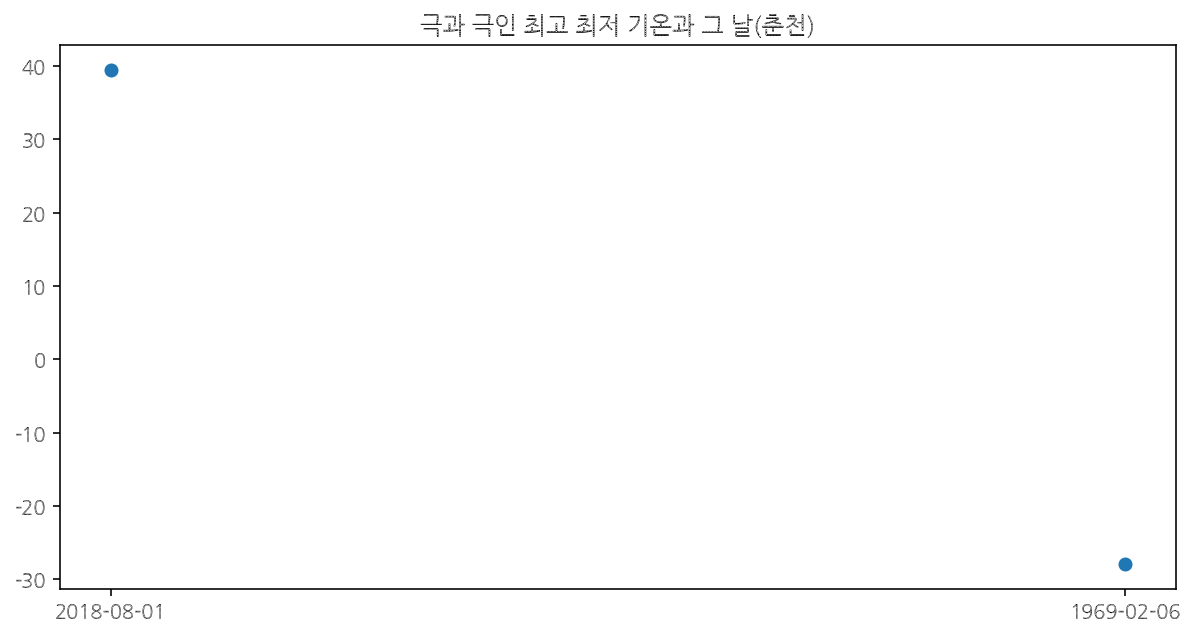

In [3]:
import csv
import matplotlib.pyplot as plt

# csv -> csv 파일 (데이터 파일을 다루기 위해 필요)
# matplotlib.pyplot-> (데이터 시각화를 위해 필요하고 시각화를 담당하는 도구인 pyplot을 plt라는 이름으로 만들어줌)

f = open('/content/gdrive/MyDrive/정보-2021/춘천(2021).csv','r',encoding='cp949')


data = csv.reader(f)  
header = next(data) 
print(header)

max_t = -2000
min_t = 777
max_d = ''
min_d = ''

for row in data: # 우리가 불러온 파일을 한줄씩 이동
  #print(row)
  if row[-1]=='':
    row[-1]=-1000
  if row[-2]=='':
    row[-2]=200
  if float(row[-1])>=max_t:
    max_t=float(row[-1])
    max_d=row[0]

  if float(row[-2])<=min_t:
    min_t=float(row[-2])
    min_d=row[0]

f.close()

print(max_t,"관측 사상 춘천이 제일 더웠던 날은 ",max_d,"입니다")
print(min_t,"관측 사상 춘천이 제일 추웠던 날은 ",min_d,"입니다")

plt.figure(figsize=(10,5)) # 시각화 결과의 크기 (가로,세로)
plt.title('극과 극인 최고 최저 기온과 그 날(춘천)') # 시각화 결과 제목
plt.scatter([max_d,min_d],[max_t,min_t]) #산포 그래프 출력
plt.savefig('/content/gdrive/MyDrive/정보-2021/춘천.png') #결과값을 파일로 출력 
plt.show() # 시각화 화면으로 출력  

# 만약 시각화 자료에서 한글이 제대로 출력되지 않는다면 컨트롤 + M 또는 런타임 -> 런타임 다시 실행 클릭 

